In [54]:
evals = list()

In [101]:
import utils.common
import evaluation
import importlib
import numpy as np
import time
from models.ConstraintAutoRec import ConstraintAutoRec 
import models.NeuralLogicRec
import tensorflow as tf
import pandas as pd

importlib.reload(utils.common)
importlib.reload(evaluation)
importlib.reload(models.NeuralLogicRec)
import itertools

ml_small = utils.common.ml_small
ml_big = utils.common.movie_lens


In [102]:
ev = evaluation.Evaluation(ml_big)
nlr = models.NeuralLogicRec.NLR(ml_big['user'], ml_big['dimensions'], epochs=1, embedding_dim=20, batch_size=32, nr_hidden_layers=4, nr_item_samples = 4096)

In [ ]:
for i in range(3):
    nlr.train(utils.common.load_dataset(ml_big), ml_big['train']['records'])
    evals_big.append(ev.evaluate_single_thread(nlr), max_nr_batches=64)
# evals.append(ev.evaluate_single_thread(nlr))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [99]:
pd.DataFrame(evals)

,accuracy,batch_size,diversity@10,diversity@5,embedding_dim,epc@10,epc@5,epd@5,epochs_trained,map@1,map@10,map@5,name,nr_hidden_layers,nr_item_samples,precision,recall
0,0.686390,32,0.252183,0.235872,20,0.617460,0.590217,0.313416,10,0.193694,0.065940,0.088986,NeuralLogicRec,4,NaN,0.901789,0.705740
1,0.711949,32,0.238558,0.228509,20,0.621144,0.596211,0.314134,10,0.202703,0.068290,0.093784,NeuralLogicRec,4,NaN,0.898222,0.745521
2,0.728780,32,0.257554,0.246774,20,0.622782,0.594744,0.317077,20,0.238739,0.076390,0.101862,NeuralLogicRec,4,NaN,0.911589,0.744965
3,0.743120,32,0.227821,0.213245,20,0.623974,0.596560,0.310586,10,0.211712,0.070393,0.092155,NeuralLogicRec,4,NaN,0.893781,0.789112
4,0.701078,32,0.229511,0.224122,20,0.627708,0.609853,0.311761,10,0.166667,0.066846,0.086896,NeuralLogicRec,4,NaN,0.899007,0.724486
5,0.700176,32,0.235141,0.230544,20,0.616326,0.590905,0.314354,10,0.193694,0.067937,0.091411,NeuralLogicRec,4,NaN,0.897636,0.727739
6,0.718229,32,0.250375,0.237244,20,0.622631,0.593622,0.317582,10,0.211712,0.067736,0.090315,NeuralLogicRec,4,NaN,0.895472,0.752808
7,0.689439,32,0.237724,0.228729,20,0.619389,0.597710,0.311611,10,0.202703,0.068396,0.092628,NeuralLogicRec,4,NaN,0.896296,0.708533
8,0.687231,32,0.239762,0.231210,20,0.620070,0.593353,0.312793,10,0.202703,0.069256,0.094595,NeuralLogicRec,4,NaN,0.890085,0.712854
9,0.750466,32,0.328167,0.331287,20,0.889000,0.866917,0.348021,10,0.063063,0.009799,0.015961,NeuralLogicRec,4,NaN,0.882253,0.808439


In [20]:
# print(np.flip(np.argsort(nlr.predict_single_user(3))))

pp = nlr.model([0,1])
print(pp)


{'likes': <tf.Tensor: id=1102616, shape=(2, 10381), dtype=float32, numpy=
array([[0.8526747 , 0.7045926 , 0.6330691 , ..., 0.39825583, 0.45905113,
        0.4567287 ],
       [0.79618174, 0.65385056, 0.53997624, ..., 0.44124037, 0.44692263,
        0.44851422]], dtype=float32)>, 'sim': <tf.Tensor: id=1102720, shape=(2, 2), dtype=float32, numpy=
array([[ 1.0000002 , -0.12351488],
       [-0.12351488,  1.        ]], dtype=float32)>, 'rated': <tf.Tensor: id=1102692, shape=(2, 10381), dtype=float32, numpy=
array([[0.33449477, 0.35893562, 0.3919698 , ..., 0.39641935, 0.44450954,
        0.44511685],
       [0.3252795 , 0.35640526, 0.39719152, ..., 0.43397862, 0.4423631 ,
        0.44228244]], dtype=float32)>, 'popular': <tf.Tensor: id=1102719, shape=(10381,), dtype=float32, numpy=
array([0.32937178, 0.3634107 , 0.39354092, ..., 0.46670574, 0.4583567 ,
       0.45903838], dtype=float32)>}


In [236]:
estimations =  nlr.model([0,1,2,3,4,5])
estimations['sim'] * 2 -1

<tf.Tensor: id=8187308, shape=(6, 6), dtype=float32, numpy=
array([[ 1.        ,  0.16507673, -0.35805917,  0.12603176, -0.03945786,
         0.04391706],
       [ 0.16507673,  1.        , -0.05640966,  0.19727993, -0.16295075,
        -0.47153115],
       [-0.35805917, -0.05640966,  1.        , -0.0329712 ,  0.22412777,
         0.09268701],
       [ 0.12603176,  0.19727993, -0.0329712 ,  1.        ,  0.0136807 ,
         0.16886008],
       [-0.03945786, -0.16295075,  0.22412777,  0.0136807 ,  1.        ,
         0.21016026],
       [ 0.04391706, -0.47153115,  0.09268701,  0.16886008,  0.21016026,
         1.        ]], dtype=float32)>

In [100]:
num_movies = 10
num_user = 3
rated = tf.convert_to_tensor(np.arange(num_movies * num_user).reshape([num_user, num_movies]))
seen = tf.convert_to_tensor(np.arange(num_movies * num_user, num_movies * num_user * 2).reshape([num_user, num_movies]))
movies = tf.tile(tf.expand_dims(tf.convert_to_tensor(np.arange(num_movies).reshape(num_movies, 1)), axis=0), [num_user, 1, 1])
users = tf.tile(tf.expand_dims(tf.convert_to_tensor([[200], [100], [300]],dtype=tf.int64), axis=1), [1, num_movies, 1])
# print(movies)
# print(users)
res = (tf.concat([users, movies], axis=-1))
res = tf.reduce_sum(res, axis=-1)
print(res.shape)
print(res)
a = tf.reshape(res, [num_movies, num_user])
print(tf.transpose(a))


(3, 10)
tf.Tensor(
[[200 201 202 203 204 205 206 207 208 209]
 [100 101 102 103 104 105 106 107 108 109]
 [300 301 302 303 304 305 306 307 308 309]], shape=(3, 10), dtype=int64)
tf.Tensor(
[[200 203 206 209 102 105 108 301 304 307]
 [201 204 207 100 103 106 109 302 305 308]
 [202 205 208 101 104 107 300 303 306 309]], shape=(3, 10), dtype=int64)


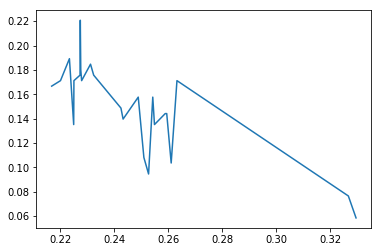

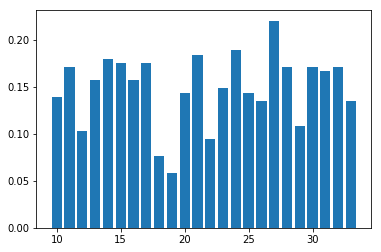

In [254]:
eval_data = pd.DataFrame(evals)[10:]
eval_data = eval_data.sort_values(by='diversity@5')
import matplotlib.pyplot as plt
plt.plot(eval_data['diversity@5'], eval_data['map@1'])
plt.show()
plt.bar(eval_data.index, eval_data['map@1'])
plt.show()

In [49]:
num_user = 3
num_items = 5
a = tf.random.uniform([num_user, num_items])
a

<tf.Tensor: id=1108121, shape=(3, 5), dtype=float32, numpy=
array([[0.9308715 , 0.21774614, 0.12640834, 0.5140575 , 0.04786909],
       [0.80032146, 0.89815044, 0.4871596 , 0.5166509 , 0.95137715],
       [0.1062125 , 0.40375376, 0.73028994, 0.08550251, 0.7097144 ]],
      dtype=float32)>

In [53]:
tf.gather(a, [0, 2], axis=1)

<tf.Tensor: id=1108136, shape=(3, 2), dtype=float32, numpy=
array([[0.9308715 , 0.12640834],
       [0.80032146, 0.4871596 ],
       [0.1062125 , 0.73028994]], dtype=float32)>

In [51]:
tf.gather_nd(a, [0,0])

<tf.Tensor: id=1108128, shape=(), dtype=float32, numpy=0.9308715>